# Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. LOAD DATASET

In [6]:
df = pd.read_csv("C:/Users/rtaha/2023-BS-AI-090/Regression/BIKE DETAILS.csv")
print("Dataset loaded successfully.")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

Dataset loaded successfully.
Shape: (1061, 7)

First 5 rows:


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


# 2. DATA INFORMATION

In [7]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB
None


# 3. CHECK MISSING VALUES

In [8]:
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [9]:
df = df.dropna()
print(f"\nShape after dropping missing values: {df.shape}")



Shape after dropping missing values: (626, 7)


In [10]:
# 4. BASIC STATISTICAL SUMMARY

In [11]:
print("\nSummary statistics:")
display(df.describe())


Summary statistics:


,selling_price,year,km_driven,ex_showroom_price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


# 5. EXPLORATORY DATA ANALYSIS (EDA)

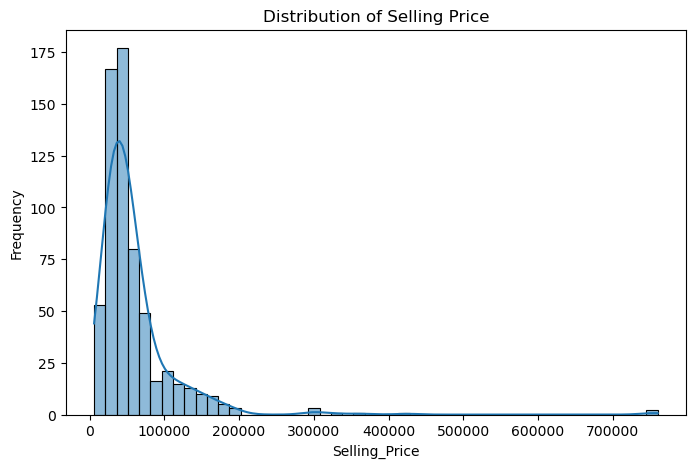

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], bins=50, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling_Price')
plt.ylabel('Frequency')
plt.show()

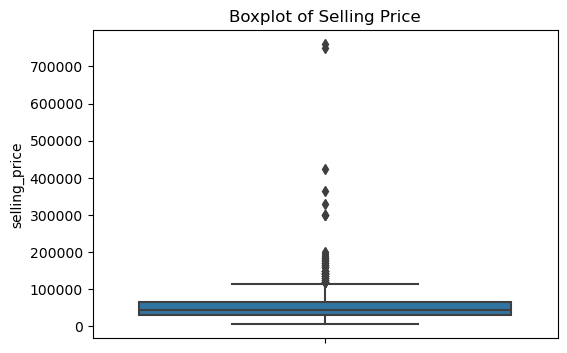

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['selling_price'])
plt.title('Boxplot of Selling Price')
plt.show()

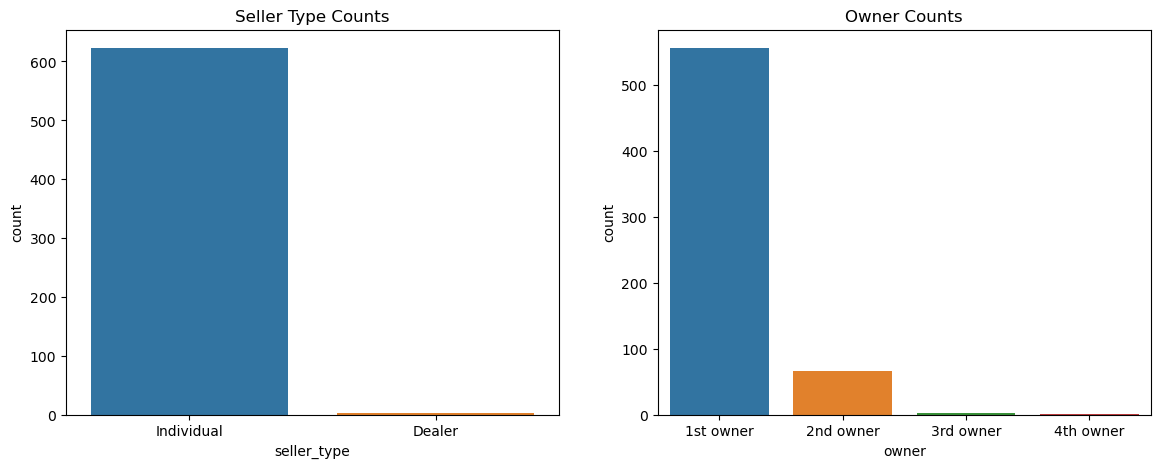

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.countplot(x='seller_type', data=df, ax=axes[0])
axes[0].set_title('Seller Type Counts')
sns.countplot(x='owner', data=df, ax=axes[1])
axes[1].set_title('Owner Counts')
plt.show()

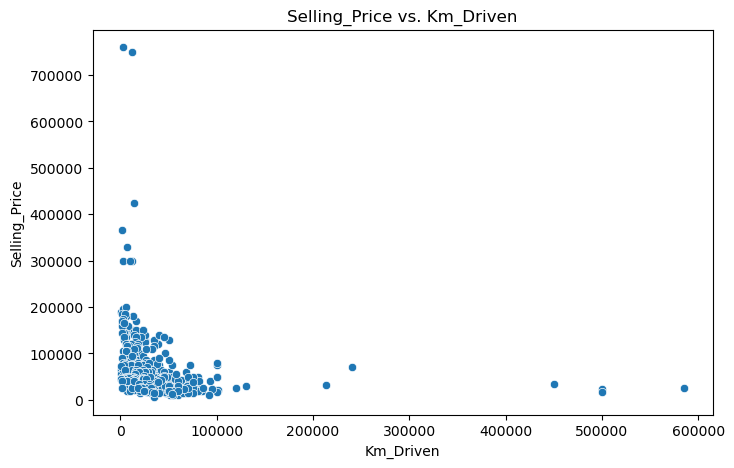

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title('Selling_Price vs. Km_Driven')
plt.xlabel('Km_Driven')
plt.ylabel('Selling_Price')
plt.show()

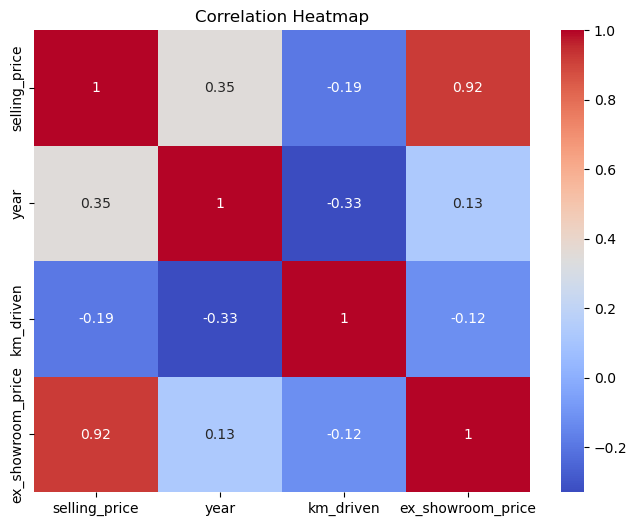

In [16]:
num_cols = ['selling_price', 'year', 'km_driven', 'ex_showroom_price']
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# 6. FEATURE ENGINEERING

In [17]:
current_year = 2025
df['age'] = current_year - df['year']


In [18]:
df.drop(columns=['year'], inplace=True)

In [19]:
print("\nAdded 'age' feature and dropped 'year'.")


Added 'age' feature and dropped 'year'.


# 7. DATA PREPARATION FOR MODELING

In [20]:
X = df.drop(columns=['selling_price', 'name'])
y = df['selling_price']

In [21]:
categorical_features = ['seller_type', 'owner']
numerical_features = X.drop(columns=categorical_features).columns.tolist()

In [22]:
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['km_driven', 'ex_showroom_price', 'age']
Categorical features: ['seller_type', 'owner']


# 8. TRAIN-TEST SPLIT

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (500, 5)
Testing data shape: (126, 5)


# 9. PIPELINE WITH PREPROCESSING AND MODELING

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)


In [25]:
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [26]:
# 10. TRAINING THE MODEL

In [27]:
model_pipeline.fit(X_train, y_train)
print("\nModel training completed.")


Model training completed.


# 11. PREDICTION ON TEST DATA

In [28]:
y_pred = model_pipeline.predict(X_test)

# 12. MODEL EVALUATION

In [29]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [30]:
print(f"\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")



Model Evaluation Metrics:
Mean Squared Error (MSE): 720000517.44
Root Mean Squared Error (RMSE): 26832.83
R-squared (R²): 0.92


# 13. VISUALIZATION OF PREDICTIONS

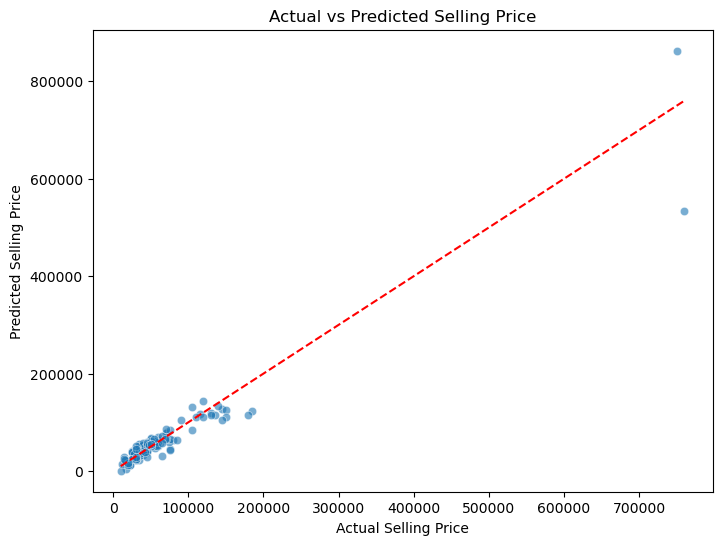

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.show()


# 14. RESIDUAL ANALYSIS

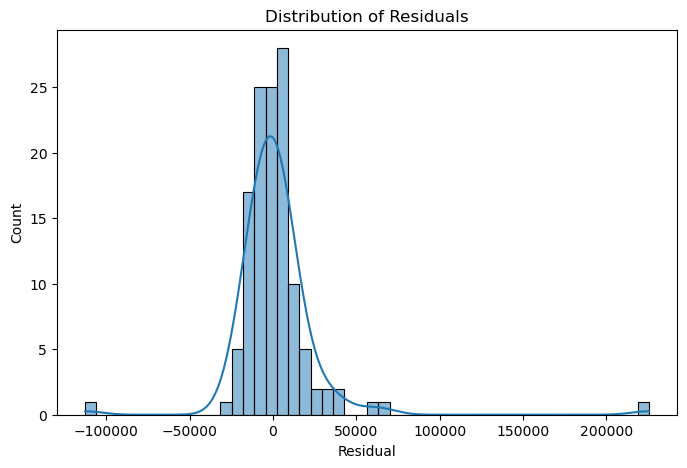

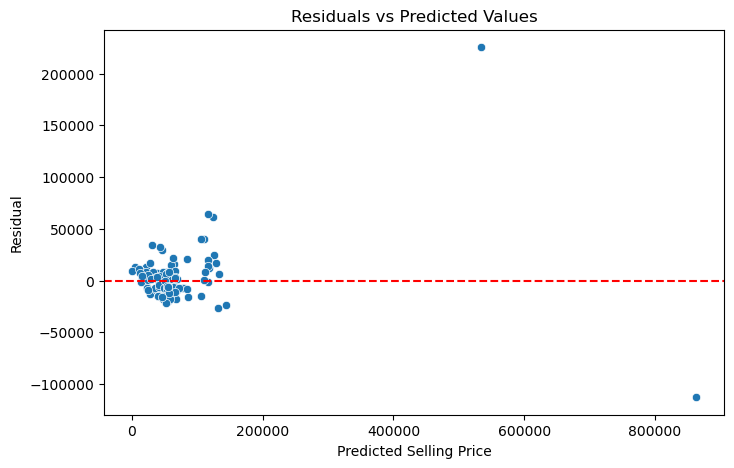

In [32]:

residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted Values')
plt.show()